In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
# import some necessary librairies
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import glob
import cv2
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
df = pd.read_csv("../data/multi_data/tree_data.csv")

In [3]:
df

,OID_,TPO,BORO,Near_Motor,Near_A,Near_B,Near_Other_Road,Near_Green,Near_Water_Link,Near_all_build,Near_listed_build,Near_conver_area,Near_GB_Access,Near_ARoad_Node,Near_BRoad_Node,Near_Pat_Node,IMD_Decile,Income_Rank,Employment_Rank,Education_Skills_Training_Rank
0,1,1,1,701.592106,260.682528,549.212274,6.875307,69.100339,738.969827,9619.264783,293.925161,443.226605,58.885106,248.163760,534.236184,58.357454,8.0,21281.0,27860.0,31496.0
1,2,1,1,4281.907771,287.444463,324.585228,11.743865,31.182096,103.198072,15431.983570,408.933868,767.726488,16.985316,275.583844,309.585228,17.099122,5.0,10719.0,10414.0,21554.0
2,3,1,1,4973.668178,84.112870,47.534243,7.361295,99.151058,519.470804,13127.260140,152.166945,1264.876450,84.151058,69.483972,33.019800,49.274497,6.0,11861.0,15680.0,27035.0
3,4,1,1,4699.855533,14.304393,986.241064,32.636169,49.032325,1818.919241,8777.704399,68.238056,87.592620,34.032325,10.872156,971.241064,0.000000,9.0,28697.0,30147.0,32588.0
4,5,1,1,4086.263899,114.203033,1013.200817,9.737121,223.217275,624.978364,15390.336520,330.404911,632.523755,220.326935,102.400772,998.370601,2.289392,7.0,17775.0,20153.0,23923.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81719,83374,0,5,2637.150628,386.865806,289.703825,5.699927,107.434821,433.928672,8.779545,338.052959,277.799648,240.031605,371.865806,279.024451,149.936164,9.0,31035.0,32545.0,32045.0
81720,83375,0,5,3751.631441,16.703041,71.689337,18.435330,77.653463,710.439298,3.827212,260.171387,0.000000,125.230712,3.435330,64.047334,51.649043,7.0,20417.0,25127.0,32513.0
81721,83376,0,5,2960.405083,81.508800,283.710962,34.206534,64.133251,200.237687,4.234195,145.078840,3.115713,66.359167,75.912691,268.710962,2.440290,7.0,18833.0,17354.0,28908.0
81722,83377,0,5,3231.468775,84.336699,453.573800,3.865525,128.669423,106.575868,5.472242,389.331091,66.293521,126.993019,71.983228,438.573800,0.000000,7.0,20417.0,25127.0,32513.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81724 entries, 0 to 81723
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   OID_                            81724 non-null  int64  
 1   TPO                             81724 non-null  int64  
 2   BORO                            81724 non-null  int64  
 3   Near_Motor                      81724 non-null  float64
 4   Near_A                          81724 non-null  float64
 5   Near_B                          81724 non-null  float64
 6   Near_Other_Road                 81724 non-null  float64
 7   Near_Green                      81724 non-null  float64
 8   Near_Water_Link                 81724 non-null  float64
 9   Near_all_build                  81724 non-null  float64
 10  Near_listed_build               81724 non-null  float64
 11  Near_conver_area                81724 non-null  float64
 12  Near_GB_Access                  

In [5]:
df_ID = df["OID_"]
df.drop("OID_", axis=1, inplace=True)

array([[<AxesSubplot:title={'center':'TPO'}>,
        <AxesSubplot:title={'center':'BORO'}>,
        <AxesSubplot:title={'center':'Near_Motor'}>,
        <AxesSubplot:title={'center':'Near_A'}>],
       [<AxesSubplot:title={'center':'Near_B'}>,
        <AxesSubplot:title={'center':'Near_Other_Road'}>,
        <AxesSubplot:title={'center':'Near_Green'}>,
        <AxesSubplot:title={'center':'Near_Water_Link'}>],
       [<AxesSubplot:title={'center':'Near_all_build'}>,
        <AxesSubplot:title={'center':'Near_listed_build'}>,
        <AxesSubplot:title={'center':'Near_conver_area'}>,
        <AxesSubplot:title={'center':'Near_GB_Access'}>],
       [<AxesSubplot:title={'center':'Near_ARoad_Node'}>,
        <AxesSubplot:title={'center':'Near_BRoad_Node'}>,
        <AxesSubplot:title={'center':'Near_Pat_Node'}>,
        <AxesSubplot:title={'center':'IMD_Decile'}>],
       [<AxesSubplot:title={'center':'Income_Rank'}>,
        <AxesSubplot:title={'center':'Employment_Rank'}>,
        <Axes

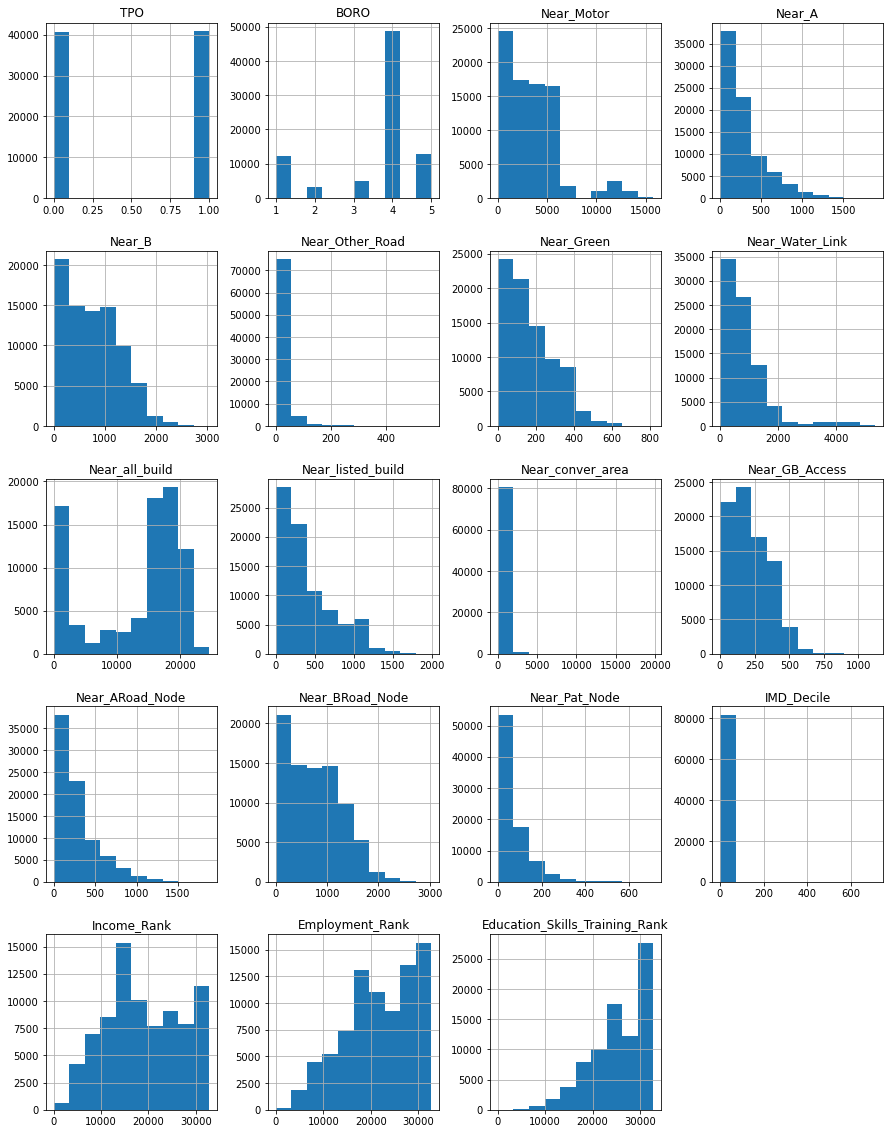

In [6]:
fig,ax = plt.subplots(figsize=(15,20))
df.hist(ax=ax)

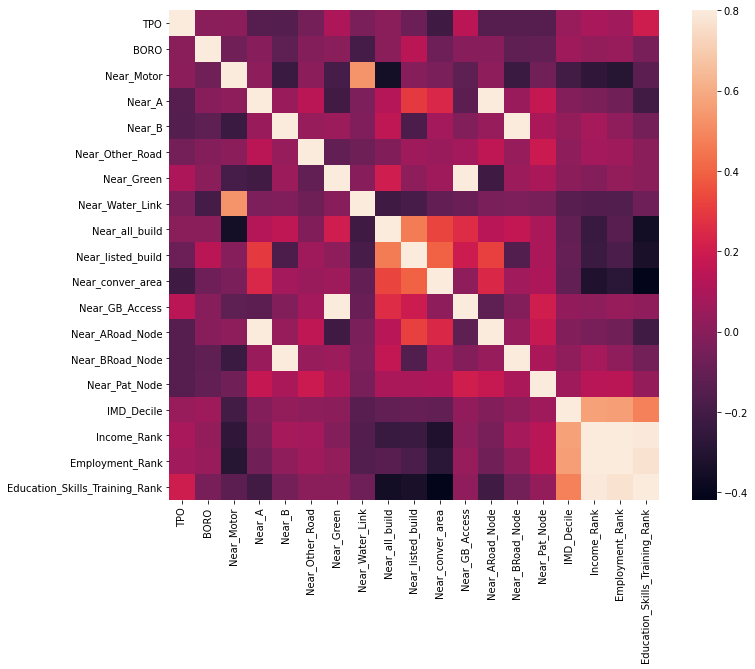

In [8]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [9]:
df.isnull().sum()

TPO                               0
BORO                              0
Near_Motor                        0
Near_A                            0
Near_B                            0
Near_Other_Road                   0
Near_Green                        0
Near_Water_Link                   0
Near_all_build                    0
Near_listed_build                 0
Near_conver_area                  0
Near_GB_Access                    0
Near_ARoad_Node                   0
Near_BRoad_Node                   0
Near_Pat_Node                     0
IMD_Decile                        0
Income_Rank                       0
Employment_Rank                   0
Education_Skills_Training_Rank    0
dtype: int64

In [10]:
df["IMD_Decile"]=df["IMD_Decile"].astype(int)

In [11]:
# select valid independent variables
cols = ["TPO", "Near_Motor", "Near_A", "Near_B", "Near_Other_Road", "Near_Green", "Near_Water_Link", 
        "Near_all_build", "Near_listed_build", "Near_conver_area", "Near_Pat_Node","IMD_Decile"]
df = df[cols]
df

,TPO,Near_Motor,Near_A,Near_B,Near_Other_Road,Near_Green,Near_Water_Link,Near_all_build,Near_listed_build,Near_conver_area,Near_Pat_Node,IMD_Decile
0,1,701.592106,260.682528,549.212274,6.875307,69.100339,738.969827,9619.264783,293.925161,443.226605,58.357454,8
1,1,4281.907771,287.444463,324.585228,11.743865,31.182096,103.198072,15431.983570,408.933868,767.726488,17.099122,5
2,1,4973.668178,84.112870,47.534243,7.361295,99.151058,519.470804,13127.260140,152.166945,1264.876450,49.274497,6
3,1,4699.855533,14.304393,986.241064,32.636169,49.032325,1818.919241,8777.704399,68.238056,87.592620,0.000000,9
4,1,4086.263899,114.203033,1013.200817,9.737121,223.217275,624.978364,15390.336520,330.404911,632.523755,2.289392,7
...,...,...,...,...,...,...,...,...,...,...,...,...
81719,0,2637.150628,386.865806,289.703825,5.699927,107.434821,433.928672,8.779545,338.052959,277.799648,149.936164,9
81720,0,3751.631441,16.703041,71.689337,18.435330,77.653463,710.439298,3.827212,260.171387,0.000000,51.649043,7
81721,0,2960.405083,81.508800,283.710962,34.206534,64.133251,200.237687,4.234195,145.078840,3.115713,2.440290,7
81722,0,3231.468775,84.336699,453.573800,3.865525,128.669423,106.575868,5.472242,389.331091,66.293521,0.000000,7


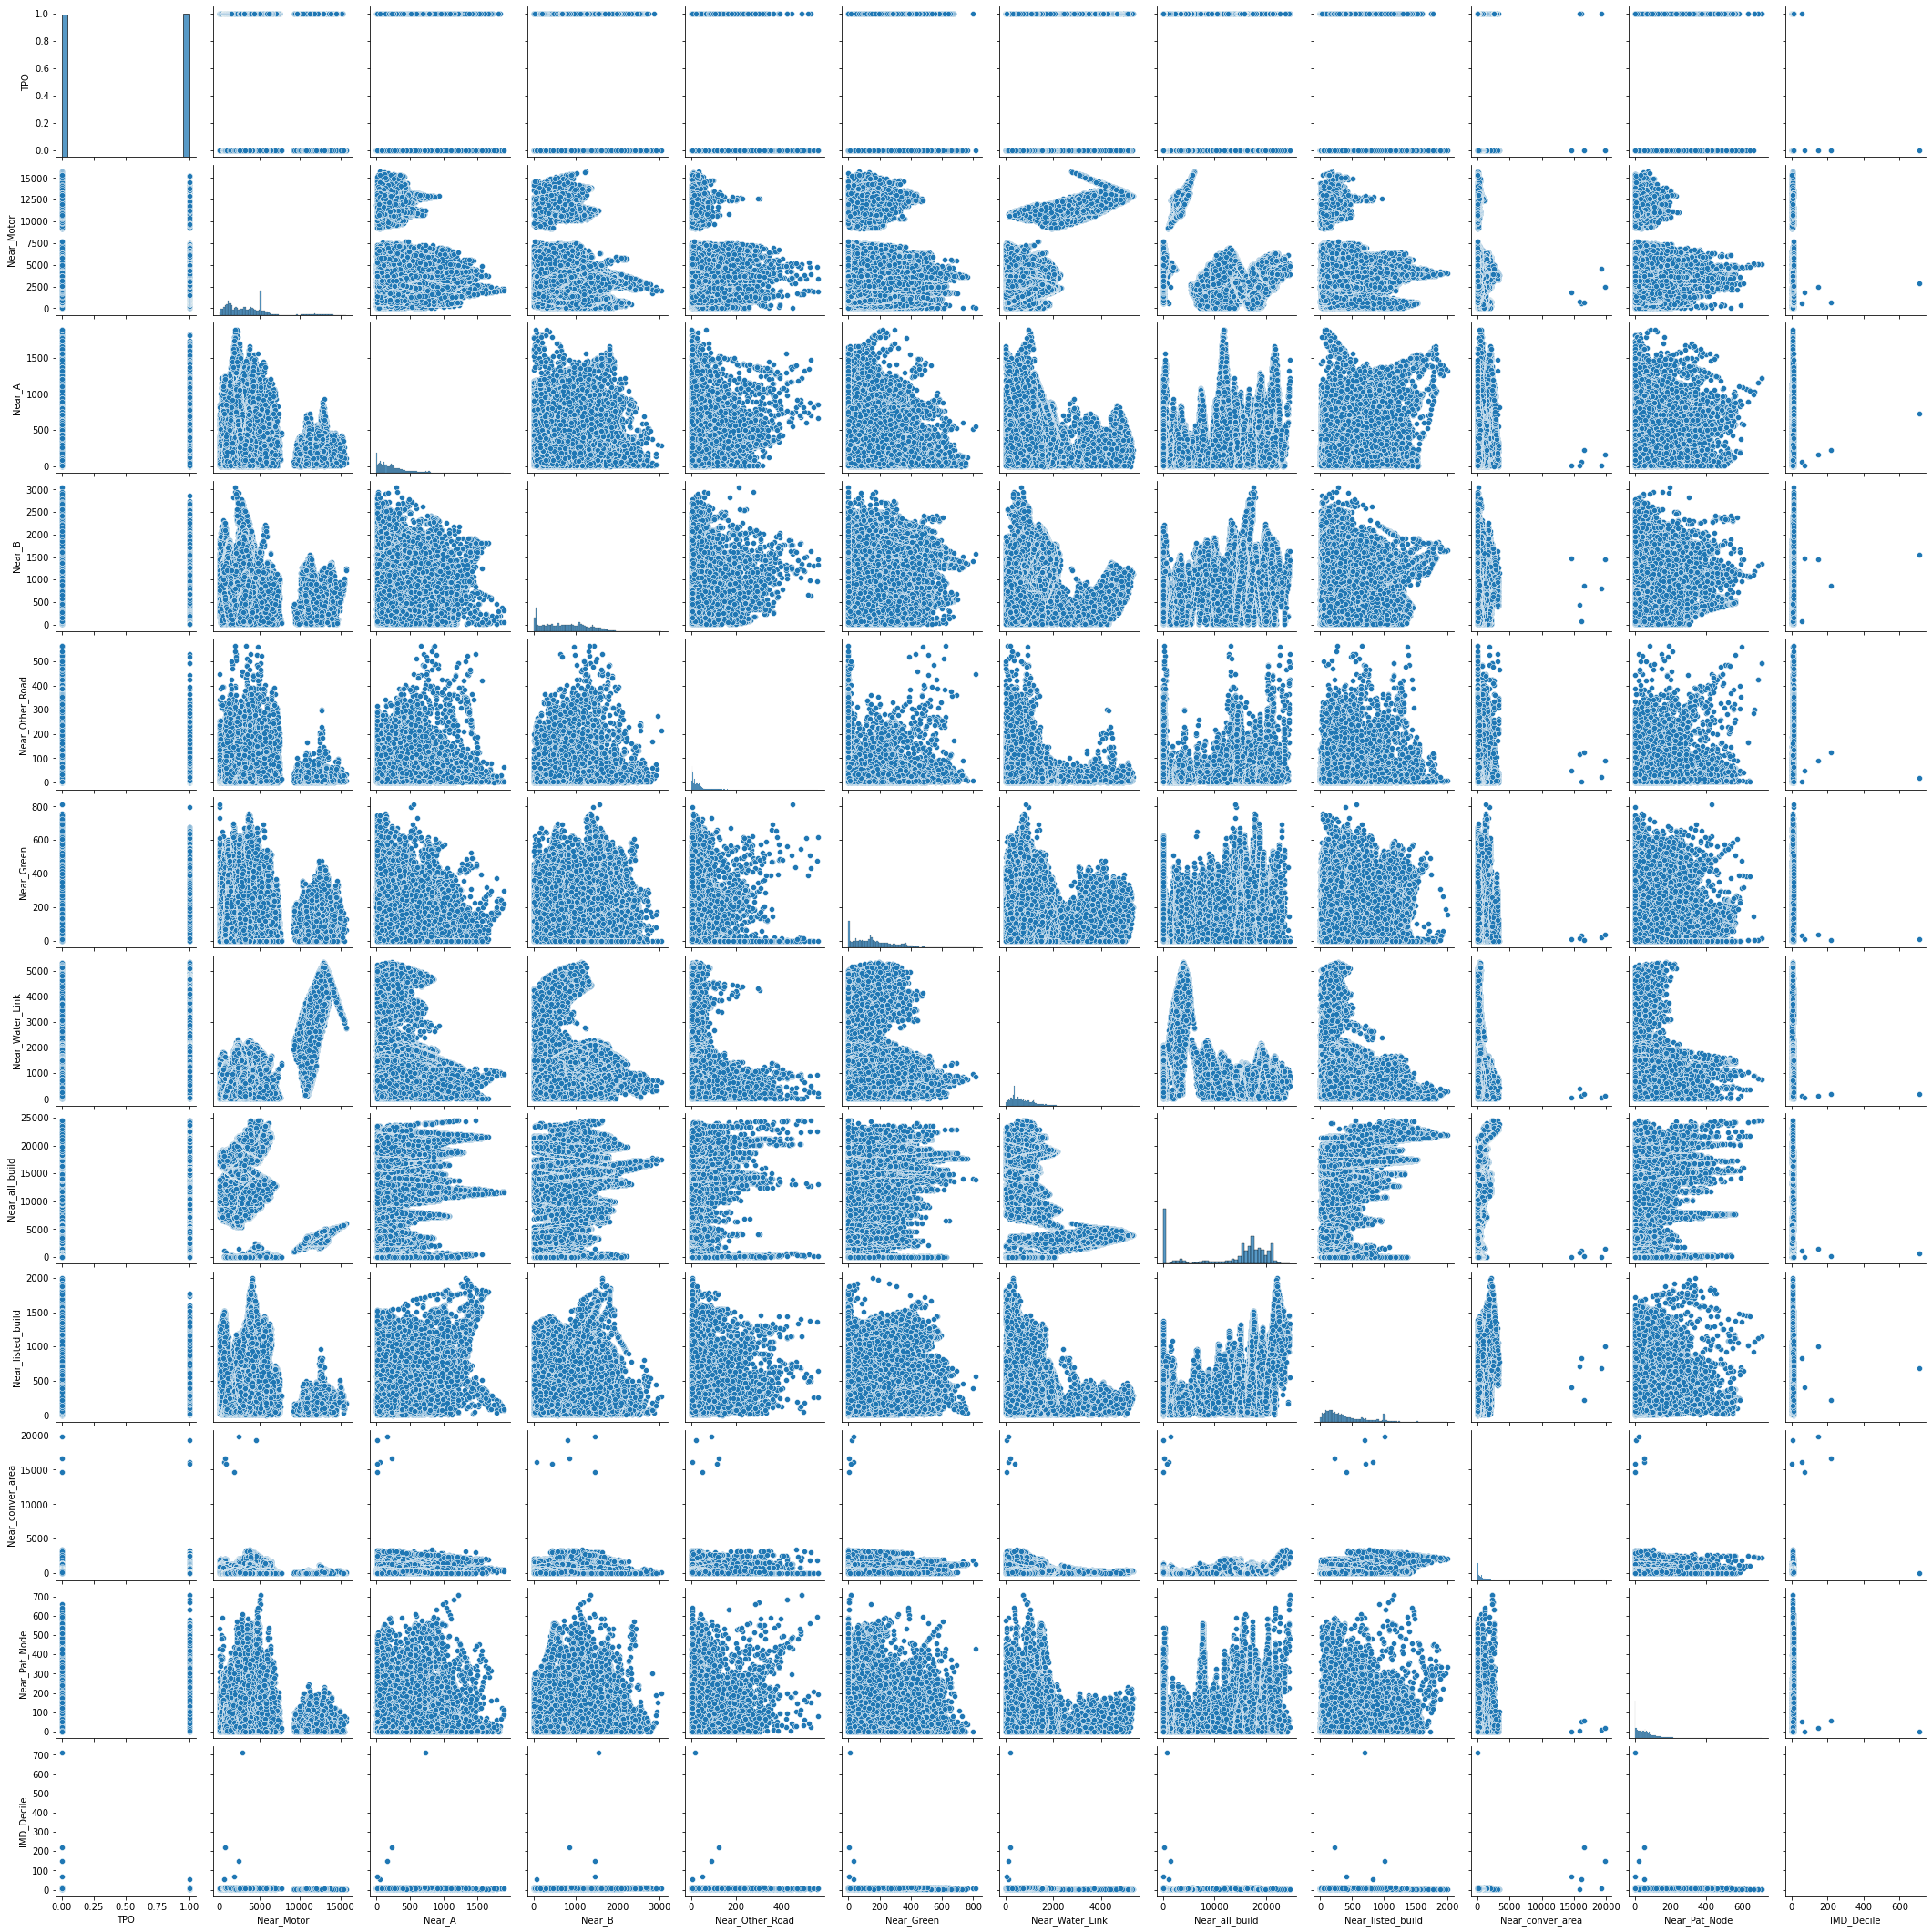

In [12]:
sns.pairplot(df, height=2.5)
plt.show()

In [13]:
continuous = ["Near_Motor", "Near_A", "Near_B", "Near_Other_Road", "Near_Green", "Near_Water_Link", 
              "Near_all_build", "Near_listed_build", "Near_conver_area", "Near_Pat_Node"]

# performin min-max scaling each continuous feature column to
# the range [0, 1]
cs = MinMaxScaler()
df[continuous] = cs.fit_transform(df[continuous])

# one-hot encode the categorical data (by definition of
# one-hot encoding, all output features are now in the range [0, 1])
socioBinarizer = LabelBinarizer().fit(df["IMD_Decile"])
df["IMD_Decile"] = socioBinarizer.transform(df["IMD_Decile"])
df

,TPO,Near_Motor,Near_A,Near_B,Near_Other_Road,Near_Green,Near_Water_Link,Near_all_build,Near_listed_build,Near_conver_area,Near_Pat_Node,IMD_Decile
0,1,0.043860,0.137514,0.179629,0.012169,0.084804,0.138247,0.391575,0.147116,0.022390,0.082156,0
1,1,0.270994,0.151675,0.105734,0.020805,0.038269,0.019304,0.628195,0.204820,0.038782,0.024072,0
2,1,0.314878,0.044083,0.014592,0.013031,0.121684,0.097183,0.534376,0.075992,0.063895,0.069369,0
3,1,0.297508,0.007144,0.323399,0.057864,0.060175,0.340289,0.357317,0.033883,0.004425,0.000000,0
4,1,0.258582,0.060005,0.332268,0.017245,0.273945,0.116921,0.626500,0.165419,0.031952,0.003223,0
...,...,...,...,...,...,...,...,...,...,...,...,...
81719,0,0.166651,0.204283,0.094259,0.010084,0.131850,0.081179,0.000357,0.169257,0.014033,0.211081,0
81720,0,0.237353,0.008414,0.022538,0.032674,0.095301,0.132910,0.000156,0.130181,0.000000,0.072712,0
81721,0,0.187158,0.042705,0.092287,0.060650,0.078708,0.037459,0.000172,0.072436,0.000157,0.003435,0
81722,0,0.204354,0.044202,0.148167,0.006830,0.157911,0.019936,0.000223,0.194984,0.003349,0.000000,0


In [14]:
df["ID"] = df_ID
df

,TPO,Near_Motor,Near_A,Near_B,Near_Other_Road,Near_Green,Near_Water_Link,Near_all_build,Near_listed_build,Near_conver_area,Near_Pat_Node,IMD_Decile,ID
0,1,0.043860,0.137514,0.179629,0.012169,0.084804,0.138247,0.391575,0.147116,0.022390,0.082156,0,1
1,1,0.270994,0.151675,0.105734,0.020805,0.038269,0.019304,0.628195,0.204820,0.038782,0.024072,0,2
2,1,0.314878,0.044083,0.014592,0.013031,0.121684,0.097183,0.534376,0.075992,0.063895,0.069369,0,3
3,1,0.297508,0.007144,0.323399,0.057864,0.060175,0.340289,0.357317,0.033883,0.004425,0.000000,0,4
4,1,0.258582,0.060005,0.332268,0.017245,0.273945,0.116921,0.626500,0.165419,0.031952,0.003223,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81719,0,0.166651,0.204283,0.094259,0.010084,0.131850,0.081179,0.000357,0.169257,0.014033,0.211081,0,83374
81720,0,0.237353,0.008414,0.022538,0.032674,0.095301,0.132910,0.000156,0.130181,0.000000,0.072712,0,83375
81721,0,0.187158,0.042705,0.092287,0.060650,0.078708,0.037459,0.000172,0.072436,0.000157,0.003435,0,83376
81722,0,0.204354,0.044202,0.148167,0.006830,0.157911,0.019936,0.000223,0.194984,0.003349,0.000000,0,83377


In [15]:
df.to_csv("../data/multi_data/tree_attributes.csv", index = False)